# Survival Annalysis Assignment 25 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("survival_unemployment.csv")

In [3]:
df.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [4]:
df.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [5]:
df['spell'].describe() # spell referring durarion of work 

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [6]:
# Spell is referring to time duration  
T = df.spell

In [10]:
#pip install lifelines

# Feature Engineering of our data 

In [15]:
#lets organise our data for fitting our model , added Unemployement column 
df.loc[df.ui == 0, 'Unemp'] = 0
df.loc[df.ui == 1, 'Unemp'] = 1

### Lets devide Data into two gropus 

In [45]:
Employed = df.query("ui == 1")
Notmployed = df.query("ui == 0")

In [12]:
from lifelines import KaplanMeierFitter

In [46]:
#lets create fitter for our dataset
Kap_Emp_model = KaplanMeierFitter()
Kap_Nemp_model = KaplanMeierFitter()

In [47]:
Kap_Emp_model.fit(durations=Employed['spell'],event_observed= Employed['Unemp'],label= 'Employed')

<lifelines.KaplanMeierFitter:"Employed", fitted with 1848 total observations, 0 right-censored observations>

In [48]:
Kap_Emp_model.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1848,1848
1.0,83,83,0,0,1848
2.0,161,161,0,0,1765
3.0,208,208,0,0,1604
4.0,143,143,0,0,1396


In [49]:
Kap_Nemp_model.fit(durations = Notmployed['spell'], event_observed= Notmployed['Unemp'],label= 'NotEmployed')

<lifelines.KaplanMeierFitter:"NotEmployed", fitted with 1495 total observations, 1495 right-censored observations>

In [50]:
Kap_Nemp_model.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1495,1495
1.0,457,0,457,0,1495
2.0,321,0,321,0,1038
3.0,216,0,216,0,717
4.0,78,0,78,0,501


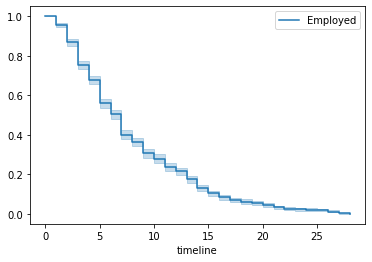

In [51]:
ax = Kap_Emp_model.plot()

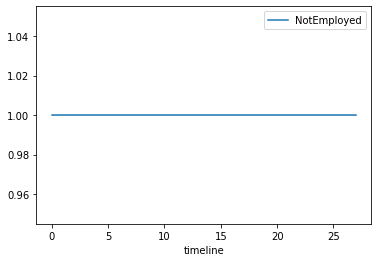

In [52]:
Kap_Nemp_model.plot()

# Predictions and Evaluations of both employed n not employed

In [53]:
Kap_Emp_model.predict(10)

0.2803030303030302

In [54]:
Kap_Nemp_model.predict(10)

1.0

In [56]:
Kap_Emp_model.survival_function_.head() # list of survival function 

,Employed
timeline,
0.0,1.000000
1.0,0.955087
2.0,0.867965
3.0,0.755411
4.0,0.678030


In [57]:
Kap_Nemp_model.survival_function_.head()

,NotEmployed
timeline,
0.0,1.0
1.0,1.0
2.0,1.0
3.0,1.0
4.0,1.0


# Lets plot the data 

Text(0.5, 1.0, 'KMP plot')

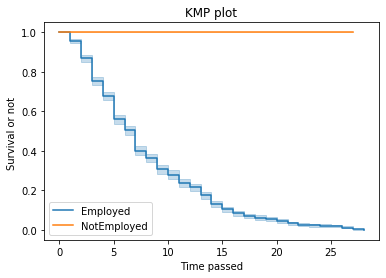

In [59]:
Kap_Emp_model.plot()
Kap_Nemp_model.plot()
plt.xlabel("Time passed")
plt.ylabel("Survival or not ")
plt.title('KMP plot')